# BGD（Batch Gradient Descent）批量梯度下降

![](Images/9.png)

# SGD（Stochastic Gradient Descent）随机梯度下降

![](Images/10.png)

# Mini-batch Gradient Descent（小批量梯度下降）

![](Images/11.png)

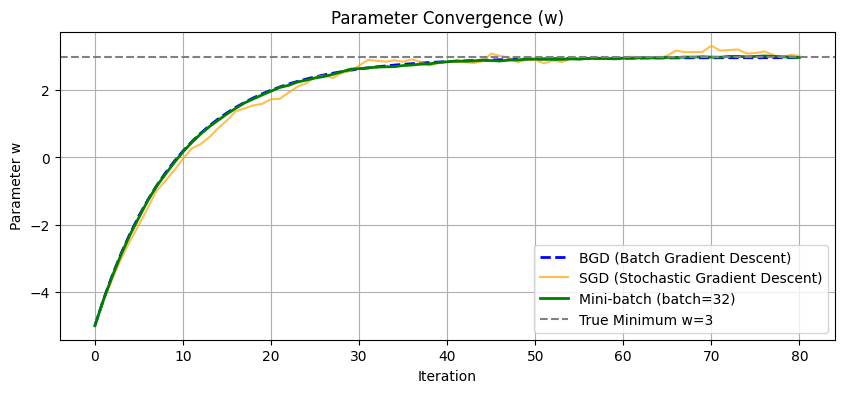

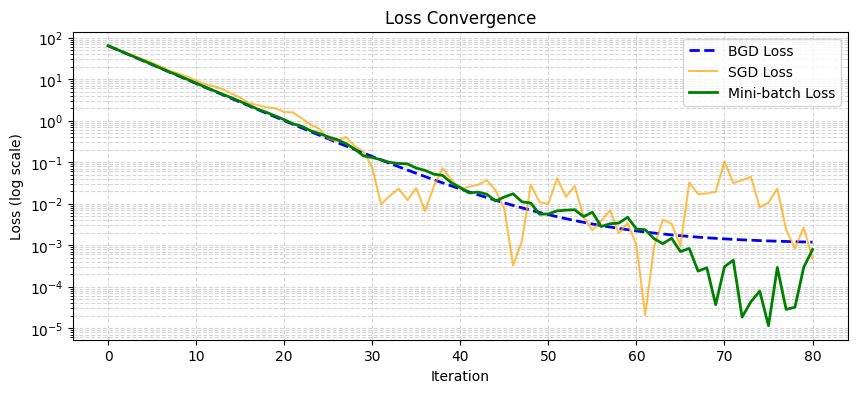

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ================================================================
# 🎯 目标函数: L(w) = (w - 3)^2
# ================================================================
def loss(w):
    return (w - 3) ** 2

np.random.seed(42)
# 200个样本，每个样本带噪声（模拟现实情况）
data = [3 + np.random.randn() * 0.8 for _ in range(200)]

# 三种梯度计算方式
def grad_bgd(w):
    return np.mean([2 * (w - d) for d in data])    #2 * (w - d)是单个样本的梯度，for d in data是遍历所有样本，np.mean([...])是平均梯度

def grad_sgd(w):
    d = np.random.choice(data)   #从 data（样本集合）中随机挑选一个样本。
    return 2 * (w - d)           

def grad_minibatch(w, batch_size=32):
    batch = np.random.choice(data, size=batch_size)  #从 data（所有训练样本）里随机抽取一批样本，抽取数量由 batch_size 决定，默认是 32
    return np.mean([2 * (w - d) for d in batch])

# 通用训练函数
def run(grad_func, label, lr=0.05, steps=80):
    w = -5.0
    traj_w, traj_L = [w], [loss(w)]
    for i in range(steps):
        g = grad_func(w)
        w -= lr * g
        traj_w.append(w)
        traj_L.append(loss(w))
    return traj_w, traj_L

# 运行三种方法
traj_bgd, loss_bgd = run(grad_bgd, "BGD")
traj_sgd, loss_sgd = run(grad_sgd, "SGD")
traj_mbgd, loss_mbgd = run(lambda w: grad_minibatch(w, batch_size=32), "Mini-batch")

# ================================================================
# 🧭 图 1: 参数收敛过程 (w 随迭代变化)
# ================================================================
plt.figure(figsize=(10, 4))
plt.plot(traj_bgd, 'b--', label="BGD (Batch Gradient Descent)", linewidth=2)
plt.plot(traj_sgd, 'orange', label="SGD (Stochastic Gradient Descent)", alpha=0.7)
plt.plot(traj_mbgd, 'g-', label="Mini-batch (batch=32)", linewidth=2)
plt.axhline(3, color='gray', linestyle='--', label="True Minimum w=3")
plt.title("Parameter Convergence (w)")
plt.xlabel("Iteration")
plt.ylabel("Parameter w")
plt.legend()
plt.grid(True)
plt.show()

# ================================================================
# 🧮 图 2: 损失函数变化 (L(w))
# ================================================================
plt.figure(figsize=(10, 4))
plt.plot(loss_bgd, 'b--', label="BGD Loss", linewidth=2)
plt.plot(loss_sgd, 'orange', alpha=0.7, label="SGD Loss")
plt.plot(loss_mbgd, 'g-', label="Mini-batch Loss", linewidth=2)
plt.yscale('log')  # 用对数坐标能更清楚看收敛速度
plt.title("Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Loss (log scale)")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
